In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme()
sns.set(rc = {"figure.figsize":(10,6), "figure.dpi":150})

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
ds1 = pd.read_csv('/kaggle/input/data-science-salaries-2023/Latest_Data_Science_Salaries.csv')

In [4]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


Questions to Answer
1. 

In [5]:
ds2 = pd.read_csv('/kaggle/input/data-science-salaries-2023/v2_Latest_Data_Science_Salaries.csv')

In [6]:
ds2.shape

(3470, 11)

In [7]:
ds3 = pd.read_csv('/kaggle/input/data-science-salaries-2023/v3_Latest_Data_Science_Salaries.csv')

In [8]:
ds3.shape

(3552, 11)

In [9]:
ds4 = pd.read_csv('/kaggle/input/data-science-salaries-2023/v4_Latest_Data_Science_Salaries.csv')

In [10]:
ds4.shape

(3683, 11)

# **Data merging**

In [11]:
ds1.columns.to_list()

['Job Title',
 'Employment Type',
 'Experience Level',
 'Expertise Level',
 'Salary',
 'Salary Currency',
 'Company Location',
 'Salary in USD',
 'Employee Residence',
 'Company Size',
 'Year']

In [12]:
ds2.columns.to_list()

['Job Title',
 'Employment Type',
 'Experience Level',
 'Expertise Level',
 'Salary',
 'Salary Currency',
 'Company Location',
 'Salary in USD',
 'Employee Residence',
 'Company Size',
 'Year']

In [13]:
ds3.columns.to_list()

['Job Title',
 'Employment Type',
 'Experience Level',
 'Expertise Level',
 'Salary',
 'Salary Currency',
 'Company Location',
 'Salary in USD',
 'Employee Residence',
 'Company Size',
 'Year']

In [14]:
ds4.columns.to_list()

['Job Title',
 'Employment Type',
 'Experience Level',
 'Expertise Level',
 'Salary',
 'Salary Currency',
 'Company Location',
 'Salary in USD',
 'Employee Residence',
 'Company Size',
 'Year']

In [15]:
Frames = [ds1 , ds2 , ds3 , ds4]

In [16]:
df = pd.concat(Frames , ignore_index=True )

In [17]:
ds1.shape[1] == ds2.shape[1] == ds3.shape[1] == ds4.shape[1]  == df.shape[1]

True

In [18]:
df['Year'].value_counts()

2023    8783
2022    4070
2021     860
2020     292
Name: Year, dtype: int64

In [19]:
df.shape

(14005, 11)

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(3684, 11)

In [22]:
df.sample(5)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
125,Data Scientist,Full-Time,Senior,Expert,205485,United States Dollar,United States,205485,United States,Medium,2023
1656,Software Data Engineer,Freelance,Senior,Expert,50000,United States Dollar,Australia,50000,Nigeria,Medium,2023
1447,Data Analyst,Full-Time,Entry,Junior,56100,United States Dollar,United States,56100,United States,Medium,2023
92,Data Engineer,Full-Time,Senior,Expert,225500,United States Dollar,United States,225500,United States,Medium,2023
682,Data Analyst,Full-Time,Senior,Expert,94000,United States Dollar,United States,94000,United States,Medium,2023


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3684 entries, 0 to 10582
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3684 non-null   object
 1   Employment Type     3684 non-null   object
 2   Experience Level    3684 non-null   object
 3   Expertise Level     3684 non-null   object
 4   Salary              3684 non-null   int64 
 5   Salary Currency     3684 non-null   object
 6   Company Location    3684 non-null   object
 7   Salary in USD       3684 non-null   int64 
 8   Employee Residence  3684 non-null   object
 9   Company Size        3684 non-null   object
 10  Year                3684 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 345.4+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,3684.0,199456.375407,691041.062844,14000.0,95000.0,140000.0,190000.0,30400000.0
Salary in USD,3684.0,142639.273887,68732.476060,15000.0,92000.0,136180.0,185000.0,500000.0
Year,3684.0,2022.547231,0.695352,2020.0,2022.0,2023.0,2023.0,2023.0


In [25]:
df['Year'] = pd.to_datetime(df['Year'] , format = "%Y")

In [26]:
df.sample(5)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
1740,Analytics Engineer,Full-Time,Senior,Expert,106000,United States Dollar,United States,106000,United States,Medium,2023-01-01
10566,ML Engineer,Full-Time,Senior,Expert,234000,United States Dollar,United States,234000,United States,Medium,2023-01-01
3045,Data Scientist,Full-Time,Entry,Junior,100000,United States Dollar,United States,100000,United States,Small,2021-01-01
1138,Data Specialist,Full-Time,Mid,Intermediate,62500,United States Dollar,United States,62500,United States,Medium,2023-01-01
2938,Analytics Engineer,Full-Time,Executive,Director,135000,United States Dollar,United States,135000,United States,Medium,2022-01-01


# **Exploratory Data Analysis**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3684 entries, 0 to 10582
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Job Title           3684 non-null   object        
 1   Employment Type     3684 non-null   object        
 2   Experience Level    3684 non-null   object        
 3   Expertise Level     3684 non-null   object        
 4   Salary              3684 non-null   int64         
 5   Salary Currency     3684 non-null   object        
 6   Company Location    3684 non-null   object        
 7   Salary in USD       3684 non-null   int64         
 8   Employee Residence  3684 non-null   object        
 9   Company Size        3684 non-null   object        
 10  Year                3684 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 345.4+ KB


In [28]:
df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,3684.0,199456.375407,691041.062844,14000.0,95000.0,140000.0,190000.0,30400000.0
Salary in USD,3684.0,142639.273887,68732.476060,15000.0,92000.0,136180.0,185000.0,500000.0


*** Some Questions need answers**
1. what is the top 10 job titles at 2023 ?
2. what is the top 10 salaries ?


In [30]:
top_10_jobs = df[df['Year']>='2023-01-01']['Job Title'].value_counts().nlargest(10).reset_index()

In [31]:
top_10_jobs

,index,Job Title
0,Data Engineer,482
1,Data Scientist,415
2,Data Analyst,324
3,Machine Learning Engineer,235
4,Analytics Engineer,107
5,Research Scientist,88
6,Research Engineer,61
7,Data Architect,56
8,ML Engineer,49
9,Applied Scientist,48


[Text(0, 0, '482'),
 Text(0, 0, '415'),
 Text(0, 0, '324'),
 Text(0, 0, '235'),
 Text(0, 0, '107'),
 Text(0, 0, '88'),
 Text(0, 0, '61'),
 Text(0, 0, '56'),
 Text(0, 0, '49'),
 Text(0, 0, '48')]

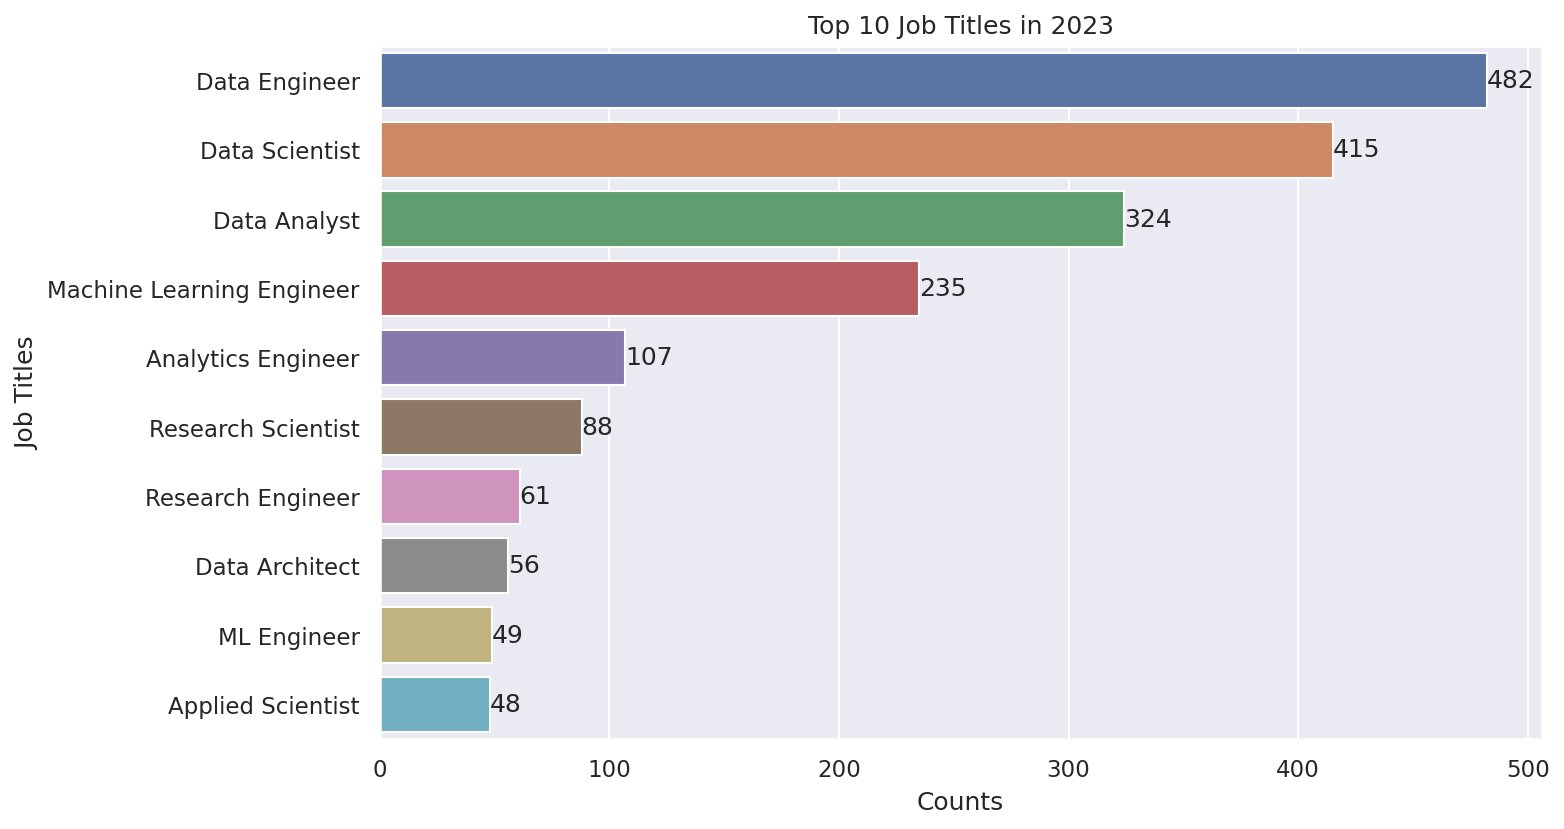

<Figure size 3750x1500 with 0 Axes>

In [32]:
fig , ax = plt.subplots()
sns.barplot(ax = ax , data = top_10_jobs , y = top_10_jobs['index'] , x = top_10_jobs['Job Title'])
ax.set(ylabel='Job Titles',xlabel='Counts', title='Top 10 Job Titles in 2023')
plt.figure(figsize = (25 , 10))
ax.bar_label(ax.containers[0])

[Text(0, 0, '3642'), Text(0, 0, '17'), Text(0, 0, '14'), Text(0, 0, '11')]

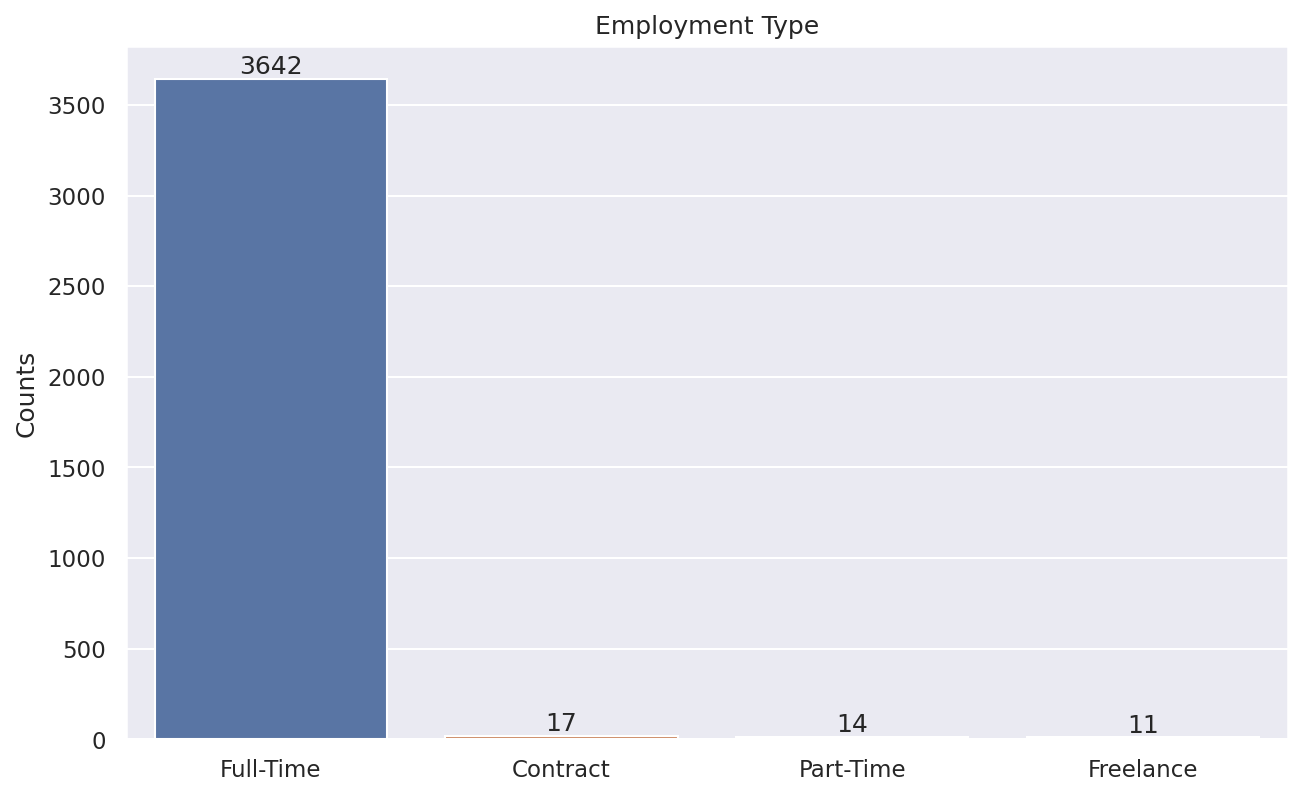

In [33]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df['Employment Type'])
ax.set(xlabel='', ylabel='Counts', title='Employment Type')
ax.bar_label(ax.containers[0])

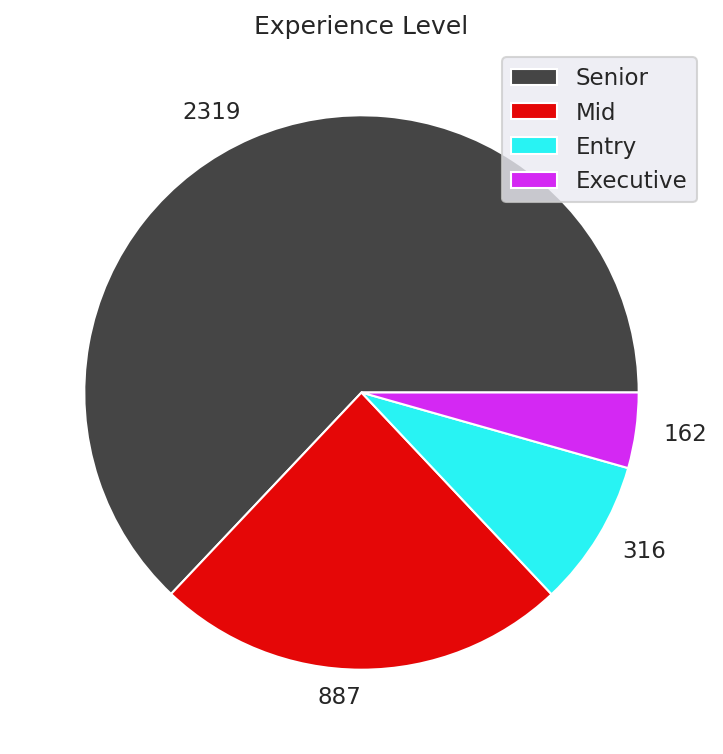

In [34]:
labels = ['Senior','Mid' , 'Entry' ,'Executive' ]
plt.figure(figsize=(6, 6))
plt.title('Experience Level')
plt.pie(df['Experience Level'].value_counts() , labels=df['Experience Level'].value_counts() , colors = ['#454545', '#E50707', '#28F3F3', '#D428F3'])
plt.legend(labels)

In [35]:
df['Experience Level'].value_counts()

Senior       2319
Mid           887
Entry         316
Executive     162
Name: Experience Level, dtype: int64

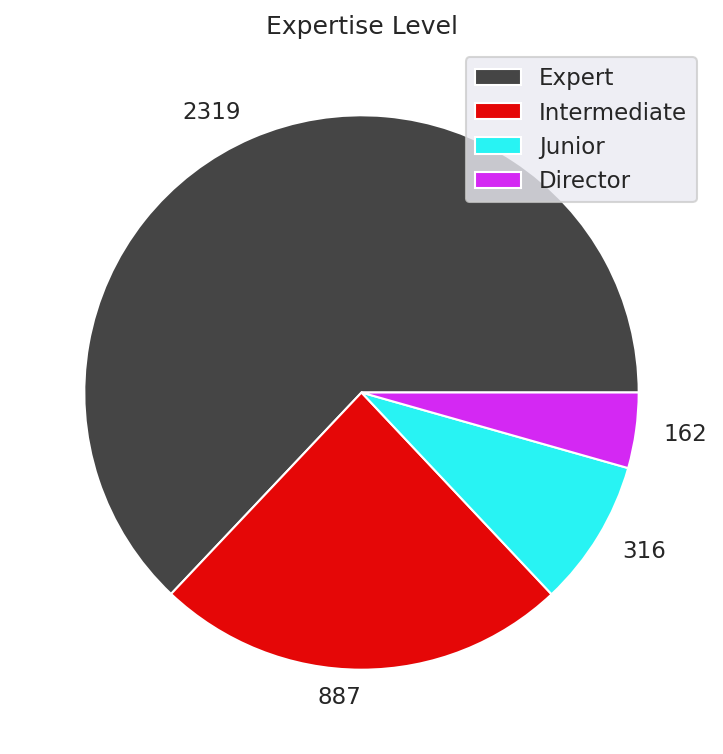

In [36]:
labels = ['Expert','Intermediate' , 'Junior' ,'Director' ]

plt.figure(figsize=(6, 6))
plt.title('Expertise Level')
plt.pie(df['Expertise Level'].value_counts() , labels=df['Expertise Level'].value_counts() , colors = ['#454545', '#E50707', '#28F3F3', '#D428F3'])
plt.legend(labels)

Text(0.5, 1.0, 'Experience Level at every Employment Type')

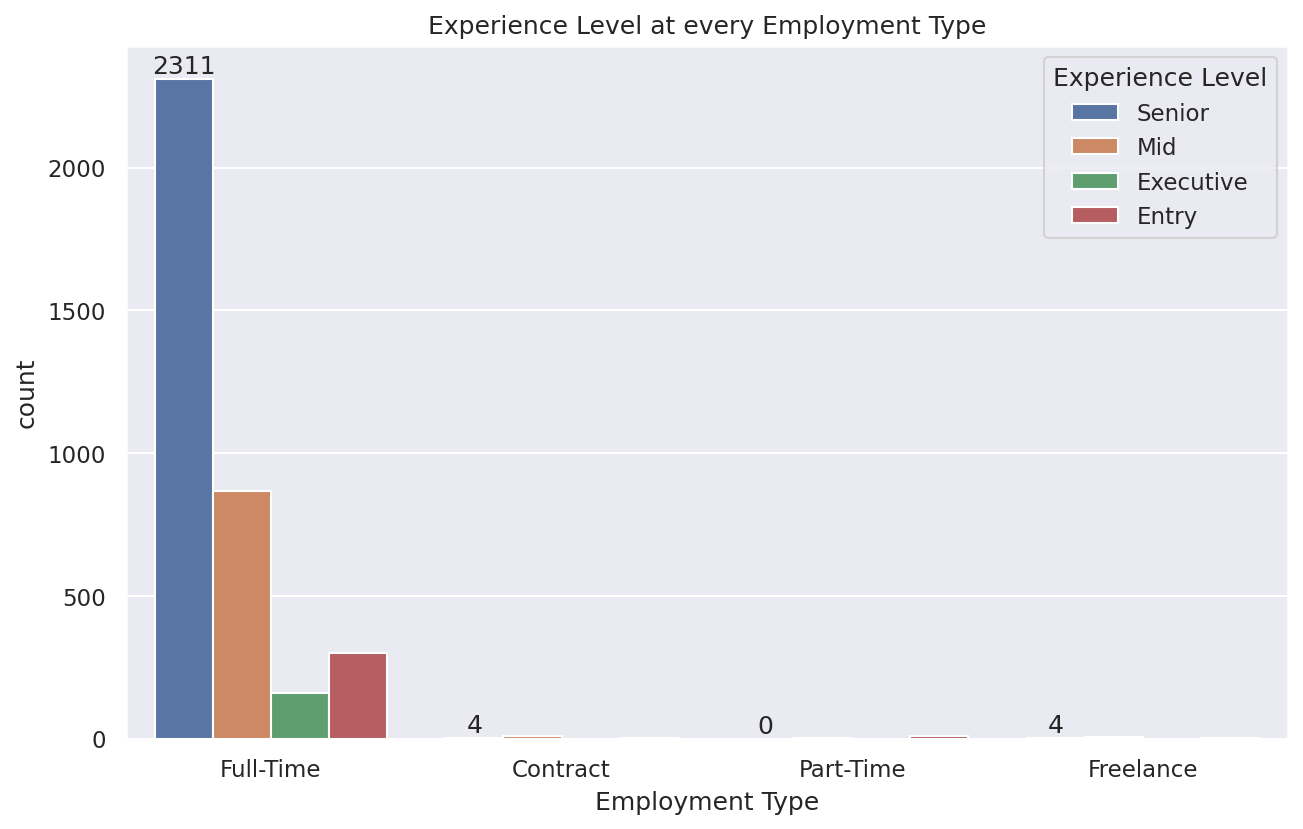

In [37]:
fig , ax = plt.subplots()
sns.countplot(ax = ax , data = df , x = df['Employment Type'] , hue='Experience Level')
ax.bar_label(ax.containers[0])
ax.set_title('Experience Level at every Employment Type')

In [38]:
top_10_salaries = df['Salary in USD'].groupby(df['Job Title']).mean().round(0).nlargest(10).sort_values(ascending = False).reset_index()
top_10_salaries

,Job Title,Salary in USD
0,Analytics Engineering Manager,399880.0
1,Data Science Tech Lead,375000.0
2,Managing Director Data Science,300000.0
3,AI Architect,289987.0
4,AWS Data Architect,258000.0
5,Cloud Data Architect,250000.0
6,AI Engineer,236117.0
7,Director of Data Science,207221.0
8,Principal Data Scientist,193988.0
9,ML Engineer,191516.0


[Text(0, 0, '399880'),
 Text(0, 0, '375000'),
 Text(0, 0, '300000'),
 Text(0, 0, '289987'),
 Text(0, 0, '258000'),
 Text(0, 0, '250000'),
 Text(0, 0, '236117'),
 Text(0, 0, '207221'),
 Text(0, 0, '193988'),
 Text(0, 0, '191516')]

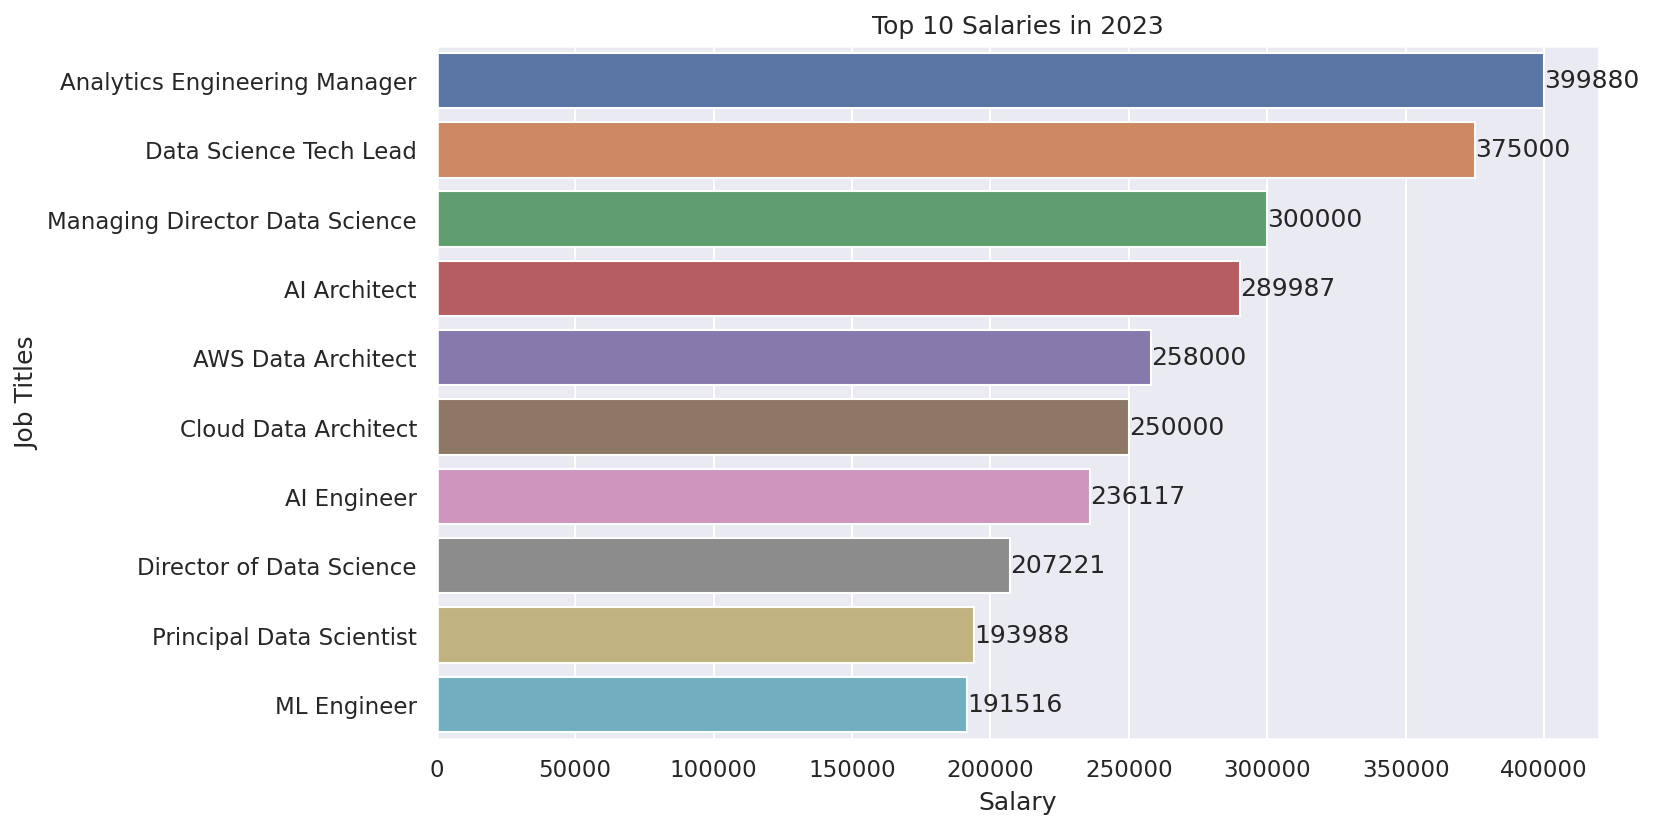

<Figure size 3750x1350 with 0 Axes>

In [39]:
fig , ax = plt.subplots()
sns.barplot(ax = ax , data = top_10_salaries , y = top_10_salaries['Job Title'] , x = top_10_salaries['Salary in USD'])
ax.set(ylabel='Job Titles',xlabel='Salary', title='Top 10 Salaries in 2023')
plt.figure(figsize = (25 , 9))
ax.bar_label(ax.containers[0])

In [40]:
top_Employment_salaries = df['Salary in USD'].groupby(df['Employment Type']).mean().round(0).nlargest(10).sort_values(ascending = False).reset_index()
top_Employment_salaries

,Employment Type,Salary in USD
0,Full-Time,143211.0
1,Contract,125313.0
2,Part-Time,84049.0
3,Freelance,54734.0


[Text(0, 0, '143211'),
 Text(0, 0, '125313'),
 Text(0, 0, '84049'),
 Text(0, 0, '54734')]

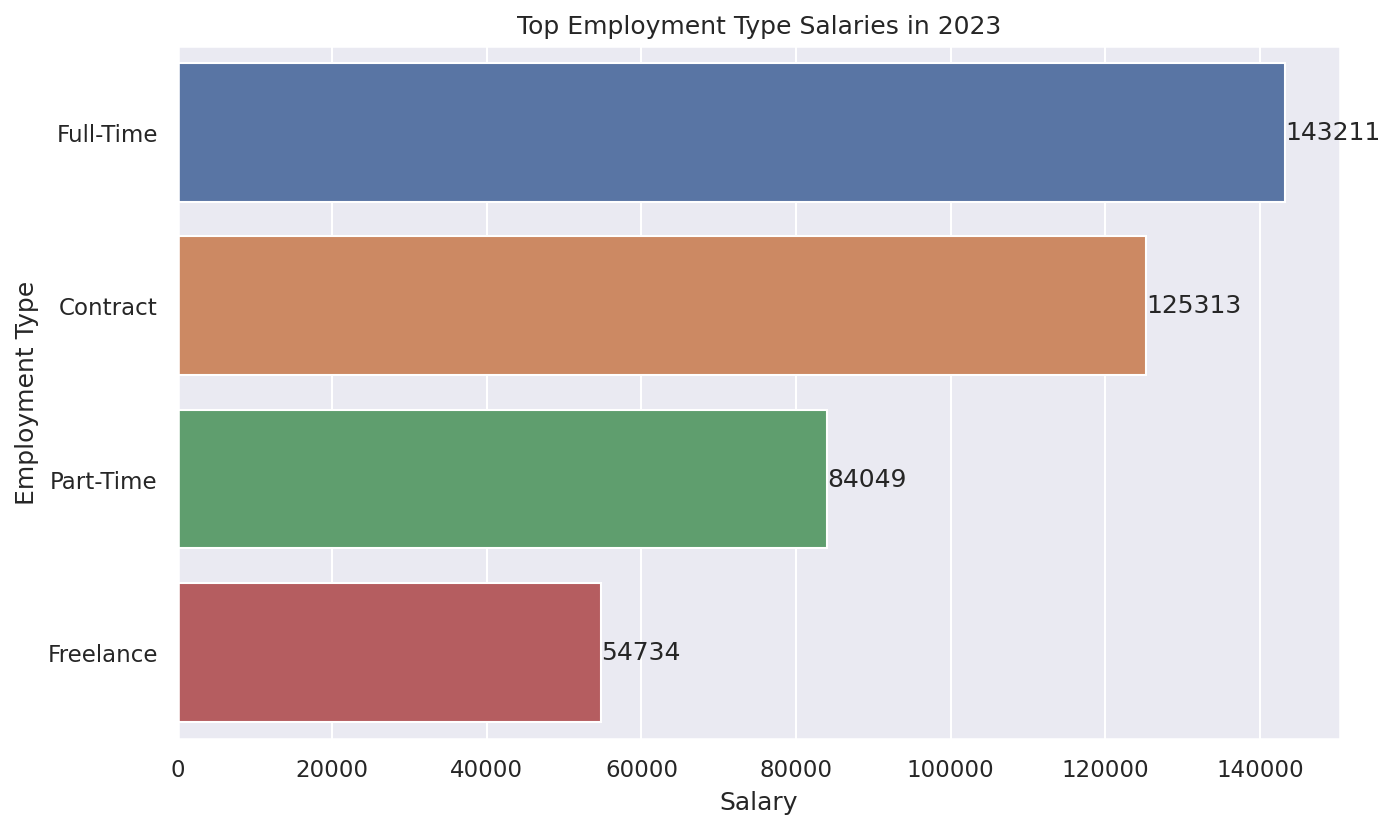

<Figure size 3750x1350 with 0 Axes>

In [41]:
fig , ax = plt.subplots()
sns.barplot(ax = ax , data = top_Employment_salaries , y = top_Employment_salaries['Employment Type'] , x = top_Employment_salaries['Salary in USD'])
ax.set(ylabel='Employment Type',xlabel='Salary', title='Top Employment Type Salaries in 2023')
plt.figure(figsize = (25 , 9))
ax.bar_label(ax.containers[0])

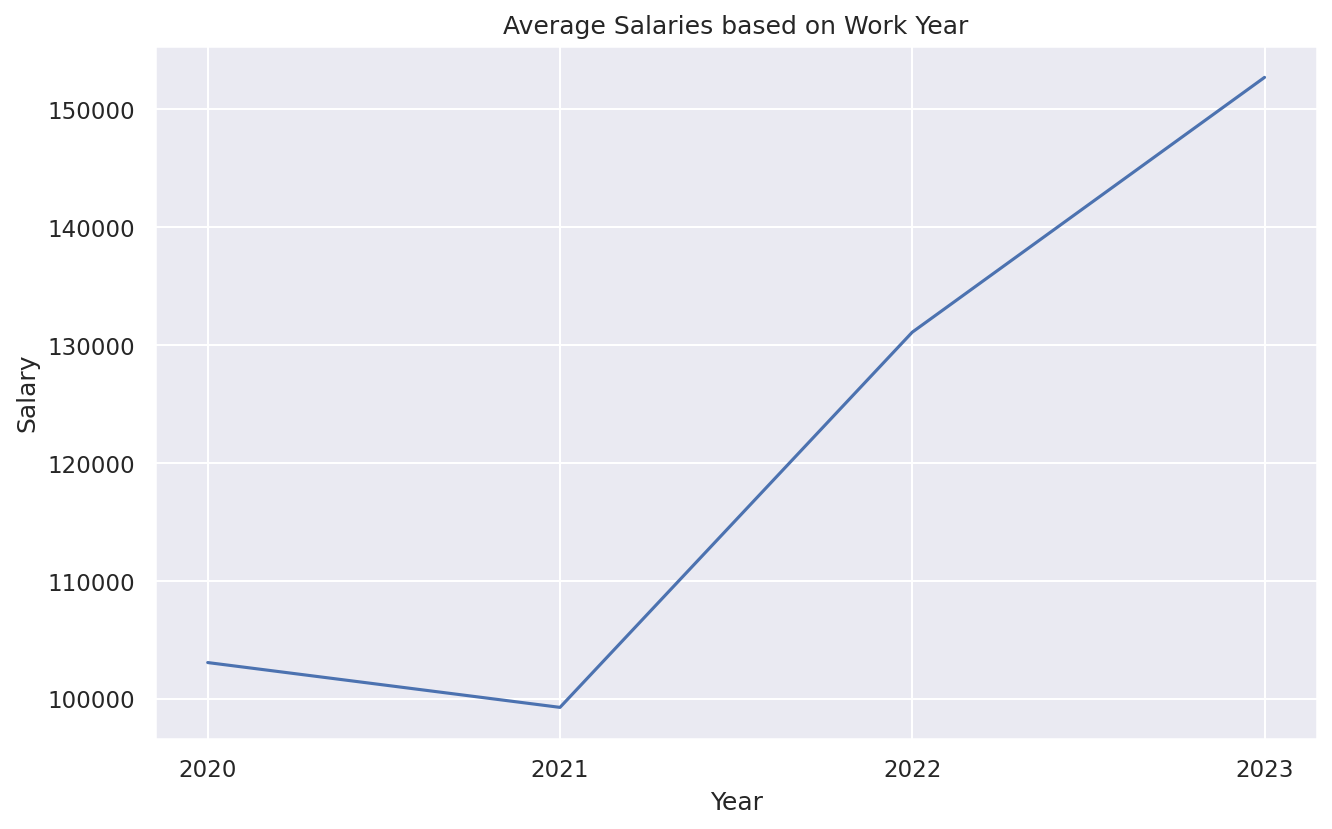

In [42]:
year_based_salary=df['Salary in USD'].groupby(df['Year']).mean()
plt.title("Average Salaries based on Work Year")
plt.xlabel('Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

# **Data Preprocessing**

In [43]:
df.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [44]:
df.head(5)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023-01-01
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023-01-01
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023-01-01
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023-01-01
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023-01-01


In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [46]:
X = df.drop(columns = ['Salary in USD' , 'Salary' , 'Year'], axis=1)
y = df['Salary in USD']


In [47]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X)


In [48]:
encoded_data.shape

(3684, 309)

In [49]:
X_train, X_test, y_train, y_test = train_test_split( encoded_data, y, test_size=0.33, random_state=42)

# **Feature Selection**

In [50]:
from sklearn.decomposition import PCA


In [51]:
pca = PCA(n_components=150)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# **Model Building**

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [53]:
model = RandomForestRegressor(max_depth =10)
model.fit(X_train , y_train
         )

RandomForestRegressor(max_depth=10)

In [54]:
y_pred_train = model.predict(X_train)

In [55]:
error = mean_absolute_error(y_train , y_pred_train)
error

33899.41175306104

In [56]:
y_pred_test = model.predict(X_test)

In [57]:
error = mean_absolute_error(y_pred_test , y_test)


In [58]:
error

41041.37400610553